In [53]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.arange(0,100,0.4)[:,None]
Y = np.sin(X)*np.floor(1+np.cos(X/7.0)) +0.1*np.random.randn(len(X),1)

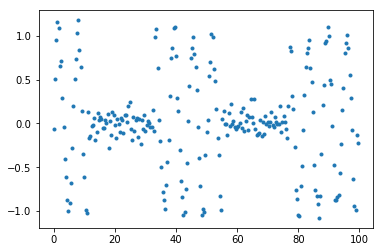

In [54]:
plt.plot(X,Y,'.')

In [55]:
krbf = GPy.kern.RBF(1,lengthscale=7.0)
#
k1 = GPy.kern.PeriodicMatern32(1,period=2*np.pi)
#I want to scale k1 by k2 (which has a longer period)
k2 = GPy.kern.PeriodicMatern32(1,period=7*2*np.pi) 

#k = k1*krbf #this works, but...
k = k1*k2 #this doesn't seem to work...
#as the model ends up with non-positive diagonal elements...
m = GPy.models.GPRegression(X,Y,k,noise_var=0.1)
#m.optimize()
m.plot(plot_limits=[-10,180])
plt.ylim([-3,3])



#PS
#I tried to add a bias to k2, as I thought that'd help, but no.
#k2 = GPy.kern.Bias(1)+GPy.kern.PeriodicMatern32(1,period=7*2*np.pi) 

LinAlgError: not pd: non-positive diagonal elements

In [ ]:
#demonstrating the RBF*PeriodicMatern32 works
k = k1*krbf
m = GPy.models.GPRegression(X,Y,k,noise_var=0.1)
m.optimize()
m.plot(plot_limits=[-10,180])
plt.ylim([-3,3])
#but I'd like to use the period over a longer period combined with the shorter period.